In [ ]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import random


In [ ]:
# Load the training and testing data MNIST
# Import dataset & split into train and test data
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
len(x_train)
len(y_train)

60000

In [ ]:
len(x_test)
len(y_test)

10000

In [ ]:
# Shape of the training dataset
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
# See first Image Matrix
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

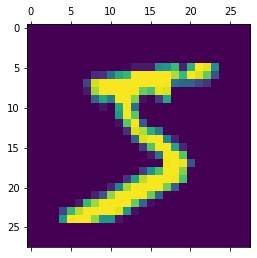

In [ ]:
# See first image
plt.matshow(x_train[0])

In [ ]:
# Normalize the iamges by scaling pixel intensities to the range 0,1
x_train=x_train/255
x_test=x_test/255
# See first Naormalize Image Matrix
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
# Define the network architecture using Keras
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(218,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 218)               171130    
                                                                 
 dense_1 (Dense)             (None, 10)                2190      
                                                                 
Total params: 173,320
Trainable params: 173,320
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the Model
model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])
#Train the model using SGD

history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6353 - accuracy: 0.8439 - val_loss: 0.3501 - val_accuracy: 0.9070
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3290 - accuracy: 0.9082 - val_loss: 0.2878 - val_accuracy: 0.9212
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2799 - accuracy: 0.9217 - val_loss: 0.2532 - val_accuracy: 0.9304
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2487 - accuracy: 0.9304 - val_loss: 0.2289 - val_accuracy: 0.9343
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2254 - accuracy: 0.9371 - val_loss: 0.2089 - val_accuracy: 0.9420
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2064 - accuracy: 0.9427 - val_loss: 0.1955 - val_accuracy: 0.9453
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1910 - accuracy: 0.9469 - val_loss: 0.1820 - val_accuracy:

In [ ]:
#Evaluate the network
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss=%.3f"%test_loss)
print("accuracy=%.3f" %test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1539 - accuracy: 0.9547
Loss=0.154
accuracy=0.955


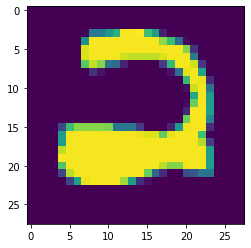

In [ ]:
# Making Prediction on New Data
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()

In [ ]:
predicted_value=model.predict(x_test)
print("Handwritten number is %d"%np.argmax(predicted_value[n]))

313/313 [==============================] - 1s 2ms/step
Handwritten number is 2


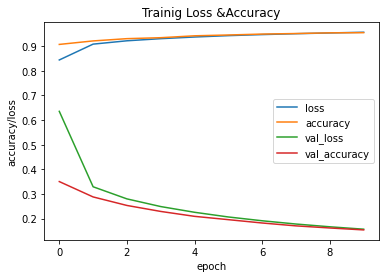

In [ ]:
# Plot the training loss and accuracy
history.history.keys()
dict_keys=(['loss','accuracy','val_loss','val_accuracy'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Trainig Loss &Accuracy')
plt.ylabel('accuracy/loss')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
plt.show()


